#### 1. Создание модели

1.1 Создадим квадрат и впишем в него круг. Сторона квадрата равна 2 радиуса круга.

$a$ = $2R$

1.2 Будем много раз в произвольном порядке бросать на нашу фигуру точки.

1.3 Вероятность попадания точки в круг равна отношению площади круга к площади квадрата

P1 = Scircle/Ssquare = $\pi R^2$/$a^2$ = $\pi R^2$/$(2R)^2$ = $\pi /4$

1.4 На большом количестве испытаний вероятность попадания в круг будет стремиться к

P2 = $N_c$/$N$ , где 

$N_c$ - количество точек, попавших в круг;
$N$ - количество всех точек

1.5 тогда можно считать, что при большом количестве испытаний $\pi /4$ = $N_c$/$N$ , следовательно  $\pi$ = $4 N_c$/$N$

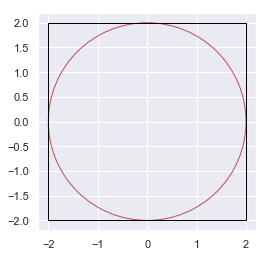

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns; sns.set()

circle = plt.Circle((0, 0), 2, color='r', fill=False)
rectangle = patches.Rectangle((-2,-2),4,4,linewidth=1,edgecolor='black',facecolor='none')

ax=plt.gca()
ax.add_patch(circle)
ax.add_patch(rectangle)

plt.axis('scaled')
plt.show()

#### 2. Генерация случайных значений

In [13]:
import numpy as np
import random

In [27]:
def dot_generator(low=-2, high=2):
    """Функция генерирует float-значения для двух координат
    x y в заданном интервале и возвращает np.array([x,y])"""
    import random
    import numpy as np
    x = (random.random() * (high - low) + low) # random.random() возвращает числа от 0 до 1, для
    # получения значений в интервале от -2 до +2 к разности (верхняя граница - нижняя граница) добавим нижнюю границу (-2)
    y = (random.random() * (high - low) + low)
    return np.array([x,y])

In [83]:
def trial(iterations=1000, low=-2, high=2):
    """Функция принимает количество итераций (int) 
    и возвращает массив с координатами (столбец 0 и 1) и 
    расстоянием от точки [0,0] в виде 
    array([[-1.93437993, -0.21006579,  3.78595335],
           [-0.1888178 , -1.79132047,  3.2444812 ],
           [ 1.91369213, -0.5135734 ,  3.9259752 ],
           [ 1.13426405, -1.8379024 ,  4.66444016]])
    """
    import numpy as np
    iterations=int(iterations) # переводим в int
    results = dot_generator(low,high) # первую строку массива заполняем 
                            # полученными из dot_generator() значениями
    for it in range(iterations-1): # бежим столько раз, сколько итераций указали на входе (минус одна)
        results = np.vstack((results, dot_generator(low,high))) # собираем массив размера (n,2)
    distance_array = results[:,0]**2 + results[:,1]**2 # создаем массив из значений сумм квадратов x и y
    distance_array = distance_array.reshape(results.shape[0], 1) # меняем форму на (n,2)
    results = np.hstack((results, distance_array)) # присоединяем distance_array справа к results
    return results

In [84]:
# создаем 1000 точек
example = trial()
example.shape

(1000, 3)

In [85]:
# смотрим, сколько точек находятся на расстоянии меньше или равно 2**2 от начала координат
example[example[:,2]<=4].shape[0]

791

In [86]:
# считаем результат по формуле из п.1.5
4*example[example[:,2]<=4].shape[0] / example.shape[0]

3.164

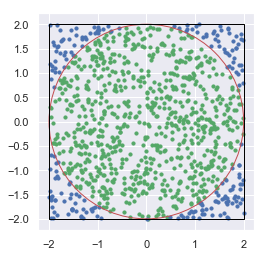

In [87]:
circle = plt.Circle((0, 0), 2, color='r', fill=False)
rectangle = patches.Rectangle((-2,-2),4,4,linewidth=1,edgecolor='black',facecolor='none')

ax=plt.gca()
ax.add_patch(circle)
ax.add_patch(rectangle)
ax.scatter(example[example[:,2]<=4][:,0], example[example[:,2]<=4][:,1], s=10, c='g')
ax.scatter(example[example[:,2]>4][:,0], example[example[:,2]>4][:,1], s=10, c='b')

plt.axis('scaled')
plt.show()

In [88]:
# Довольно близко попали!

#### 3. Применение на большом количестве попыток

In [89]:
import pandas as pd

In [103]:
iterations = [1000]*4 + [10000]*4 + [100000]*2
epochs = len(iterations)
low = -2
high = -low

In [104]:
def pipeline(epochs, low, high, iterations):
    
    import pandas as pd
    R_list = []
    N_list = []
    Pi_list = []
    
    for i in iterations:
        arr = trial(iterations=i, low=low, high=high)
        R = (high-low)/2
        N = arr.shape[0]
        Pi = 4*arr[arr[:,2]<=4].shape[0] / arr.shape[0]
        R_list.append(R)
        N_list.append(N)
        Pi_list.append(Pi)
        
    R_array = np.array(R_list).reshape(len(R_list), 1)
    N_array = np.array(N_list).reshape(len(N_list), 1)
    Pi_array = np.array(Pi_list).reshape(len(Pi_list), 1)
    
    array = np.hstack((R_array, N_array))
    array = np.hstack((array, Pi_array))
 
    return pd.DataFrame(array, columns=['Radius', 'Dots', 'Estimated_Pi'])
        

In [105]:
df = pipeline(epochs=epochs, low=low, high=high, iterations=iterations)
df

,Radius,Dots,Estimated_Pi
0,2.0,1000.0,3.11600
1,2.0,1000.0,3.11200
2,2.0,1000.0,3.13600
3,2.0,1000.0,3.05600
4,2.0,10000.0,3.13960
5,2.0,10000.0,3.11840
6,2.0,10000.0,3.15360
7,2.0,10000.0,3.13800
8,2.0,100000.0,3.13856
9,2.0,100000.0,3.14040


In [106]:
df['Estimated_Pi'].mean()

3.124856

In [107]:
# Довольно неплохо! При бОльшем количестве итераций и точек должно быть точнее.